# EDA

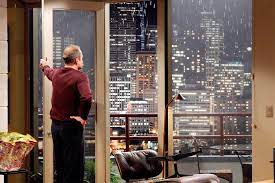

Three weeks into the data science bootcamp, I got my hands on my first time-gated exploratory data analysis (EDA) challenge. In this challenge I had access to housing data on King County, Seattle. 

Which leads to me to the purpose of this challenge. The task was to come up with three (simple) hypotheses that could guide and help my (hypothetical) client into making the right decision. 

Started by importing needed libraries.

In [15]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Read in the data from a CSV file I queried and generated beforehand from SQL.

In [16]:
#import the data from a csv-file and look at top 5 rows.
df = pd.read_csv('data/eda.csv')
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


In [17]:
#get some basic information on the size of the table
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,21597.000,21145.000,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,291.857,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,442.491,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,0.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000


Checked for potential duplicated IDs

In [18]:
#check for duplicated IDs
df.id.duplicated().value_counts()

#look at the houses that occur more than once, to check whether they are duplicates
df_duplicates = df.copy()

df_duplicates = df[df.duplicated(subset=['id'], keep=False)]
df_duplicates.head() #houses that occur more than once, are correctly in the table, 
                     #because they were sold more than once.

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
93,6021501535,3.000,1.500,1580.000,5000.000,1.000,0.000,0.000,3,8,...,290.000,1939,0.000,98117,47.687,-122.386,1570.000,4500.000,2014-07-25,430000.000
94,6021501535,3.000,1.500,1580.000,5000.000,1.000,0.000,0.000,3,8,...,290.000,1939,0.000,98117,47.687,-122.386,1570.000,4500.000,2014-12-23,700000.000
313,4139480200,4.000,3.250,4290.000,12103.000,1.000,0.000,3.000,3,11,...,1600.000,1997,0.000,98006,47.550,-122.102,3860.000,11244.000,2014-06-18,1380000.000
314,4139480200,4.000,3.250,4290.000,12103.000,1.000,0.000,3.000,3,11,...,1600.000,1997,0.000,98006,47.550,-122.102,3860.000,11244.000,2014-12-09,1400000.000
324,7520000520,2.000,1.000,1240.000,12092.000,1.000,0.000,0.000,3,6,...,280.000,1922,19840.000,98146,47.496,-122.352,1820.000,7460.000,2014-09-05,232000.000


Working on a copy of the dataframe now. Dropping rows with Null values in the waterfront column. The clients wish was to have no waterfront.

In [19]:
#create copy of original dataframe
df_cp = df.copy()

#drop the row if there is a null value in the waterfront column
df_cp.dropna(subset=['waterfront'],inplace=True)

#turn the floats in the waterfront, price and yr_built to int
df_cp['waterfront'] = df_cp['waterfront'].astype(int)
df_cp['price'] = df_cp['price'].astype(int)
df_cp['yr_built'] = df_cp['yr_built'].astype(int)

df_cp.head()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000
5,7237550310,4.000,4.500,5420.000,101930.000,1.000,0,0.000,3,11,...,1530.000,2001,0.000,98053,47.656,-122.005,4760.000,101930.000,2014-05-12,1230000


Since, my client is from the UK and now moving to the US, he wants all data presented as sqm and NOT sqft.

In [20]:
#convert ft**2 to m**2
df_converted = df_cp.copy()

conversion_factor = 0.092903

df_converted['sqft_living'] = df_cp['sqft_living']*conversion_factor
df_converted['sqft_lot'] = df_cp['sqft_lot']*conversion_factor
df_converted['sqft_living15'] = df_cp['sqft_living15']*conversion_factor
df_converted['sqft_lot15'] = df_cp['sqft_lot15']*conversion_factor
df_converted['sqft_basement'] = df_cp['sqft_basement']*conversion_factor

df_converted.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
1,6414100192,3.000,2.250,238.761,672.804,2.000,0,0.000,3,7,...,37.161,1951,19910.000,98125,47.721,-122.319,157.006,709.686,2014-12-09,538000
2,5631500400,2.000,1.000,71.535,929.030,1.000,0,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,252.696,748.984,2015-02-25,180000
3,2487200875,4.000,3.000,182.090,464.515,1.000,0,0.000,5,7,...,84.542,1965,0.000,98136,47.521,-122.393,126.348,464.515,2014-12-09,604000
4,1954400510,3.000,2.000,156.077,750.656,1.000,0,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,167.225,697.051,2015-02-18,510000
5,7237550310,4.000,4.500,503.534,9469.603,1.000,0,0.000,3,11,...,142.142,2001,0.000,98053,47.656,-122.005,442.218,9469.603,2014-05-12,1230000


Mapping a yes or no onto the 1 or 0 in the waterfront column. 

In [21]:
#turn waterfront 1 & 0 into yes & no
df_converted.waterfront  = df.waterfront.map({1:'yes', 0:'no'})
df_converted.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
1,6414100192,3.000,2.250,238.761,672.804,2.000,no,0.000,3,7,...,37.161,1951,19910.000,98125,47.721,-122.319,157.006,709.686,2014-12-09,538000
2,5631500400,2.000,1.000,71.535,929.030,1.000,no,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,252.696,748.984,2015-02-25,180000
3,2487200875,4.000,3.000,182.090,464.515,1.000,no,0.000,5,7,...,84.542,1965,0.000,98136,47.521,-122.393,126.348,464.515,2014-12-09,604000
4,1954400510,3.000,2.000,156.077,750.656,1.000,no,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,167.225,697.051,2015-02-18,510000
5,7237550310,4.000,4.500,503.534,9469.603,1.000,no,0.000,3,11,...,142.142,2001,0.000,98053,47.656,-122.005,442.218,9469.603,2014-05-12,1230000


In [22]:
#Create correlation matrix
df_corr = df_converted.copy()

#drop id, date, waterfront column
df_corr.drop(['date', 'id','waterfront'], axis='columns', inplace=True)

#calculate correlation matrix
corr = df_corr.corr()

#create correlation heatmap figure

fig_corr  = px.imshow(corr)

fig_corr.show()


Get an easy and fast visual overview of all interesting data. Allows to check for distribution and eyeballing correlation.

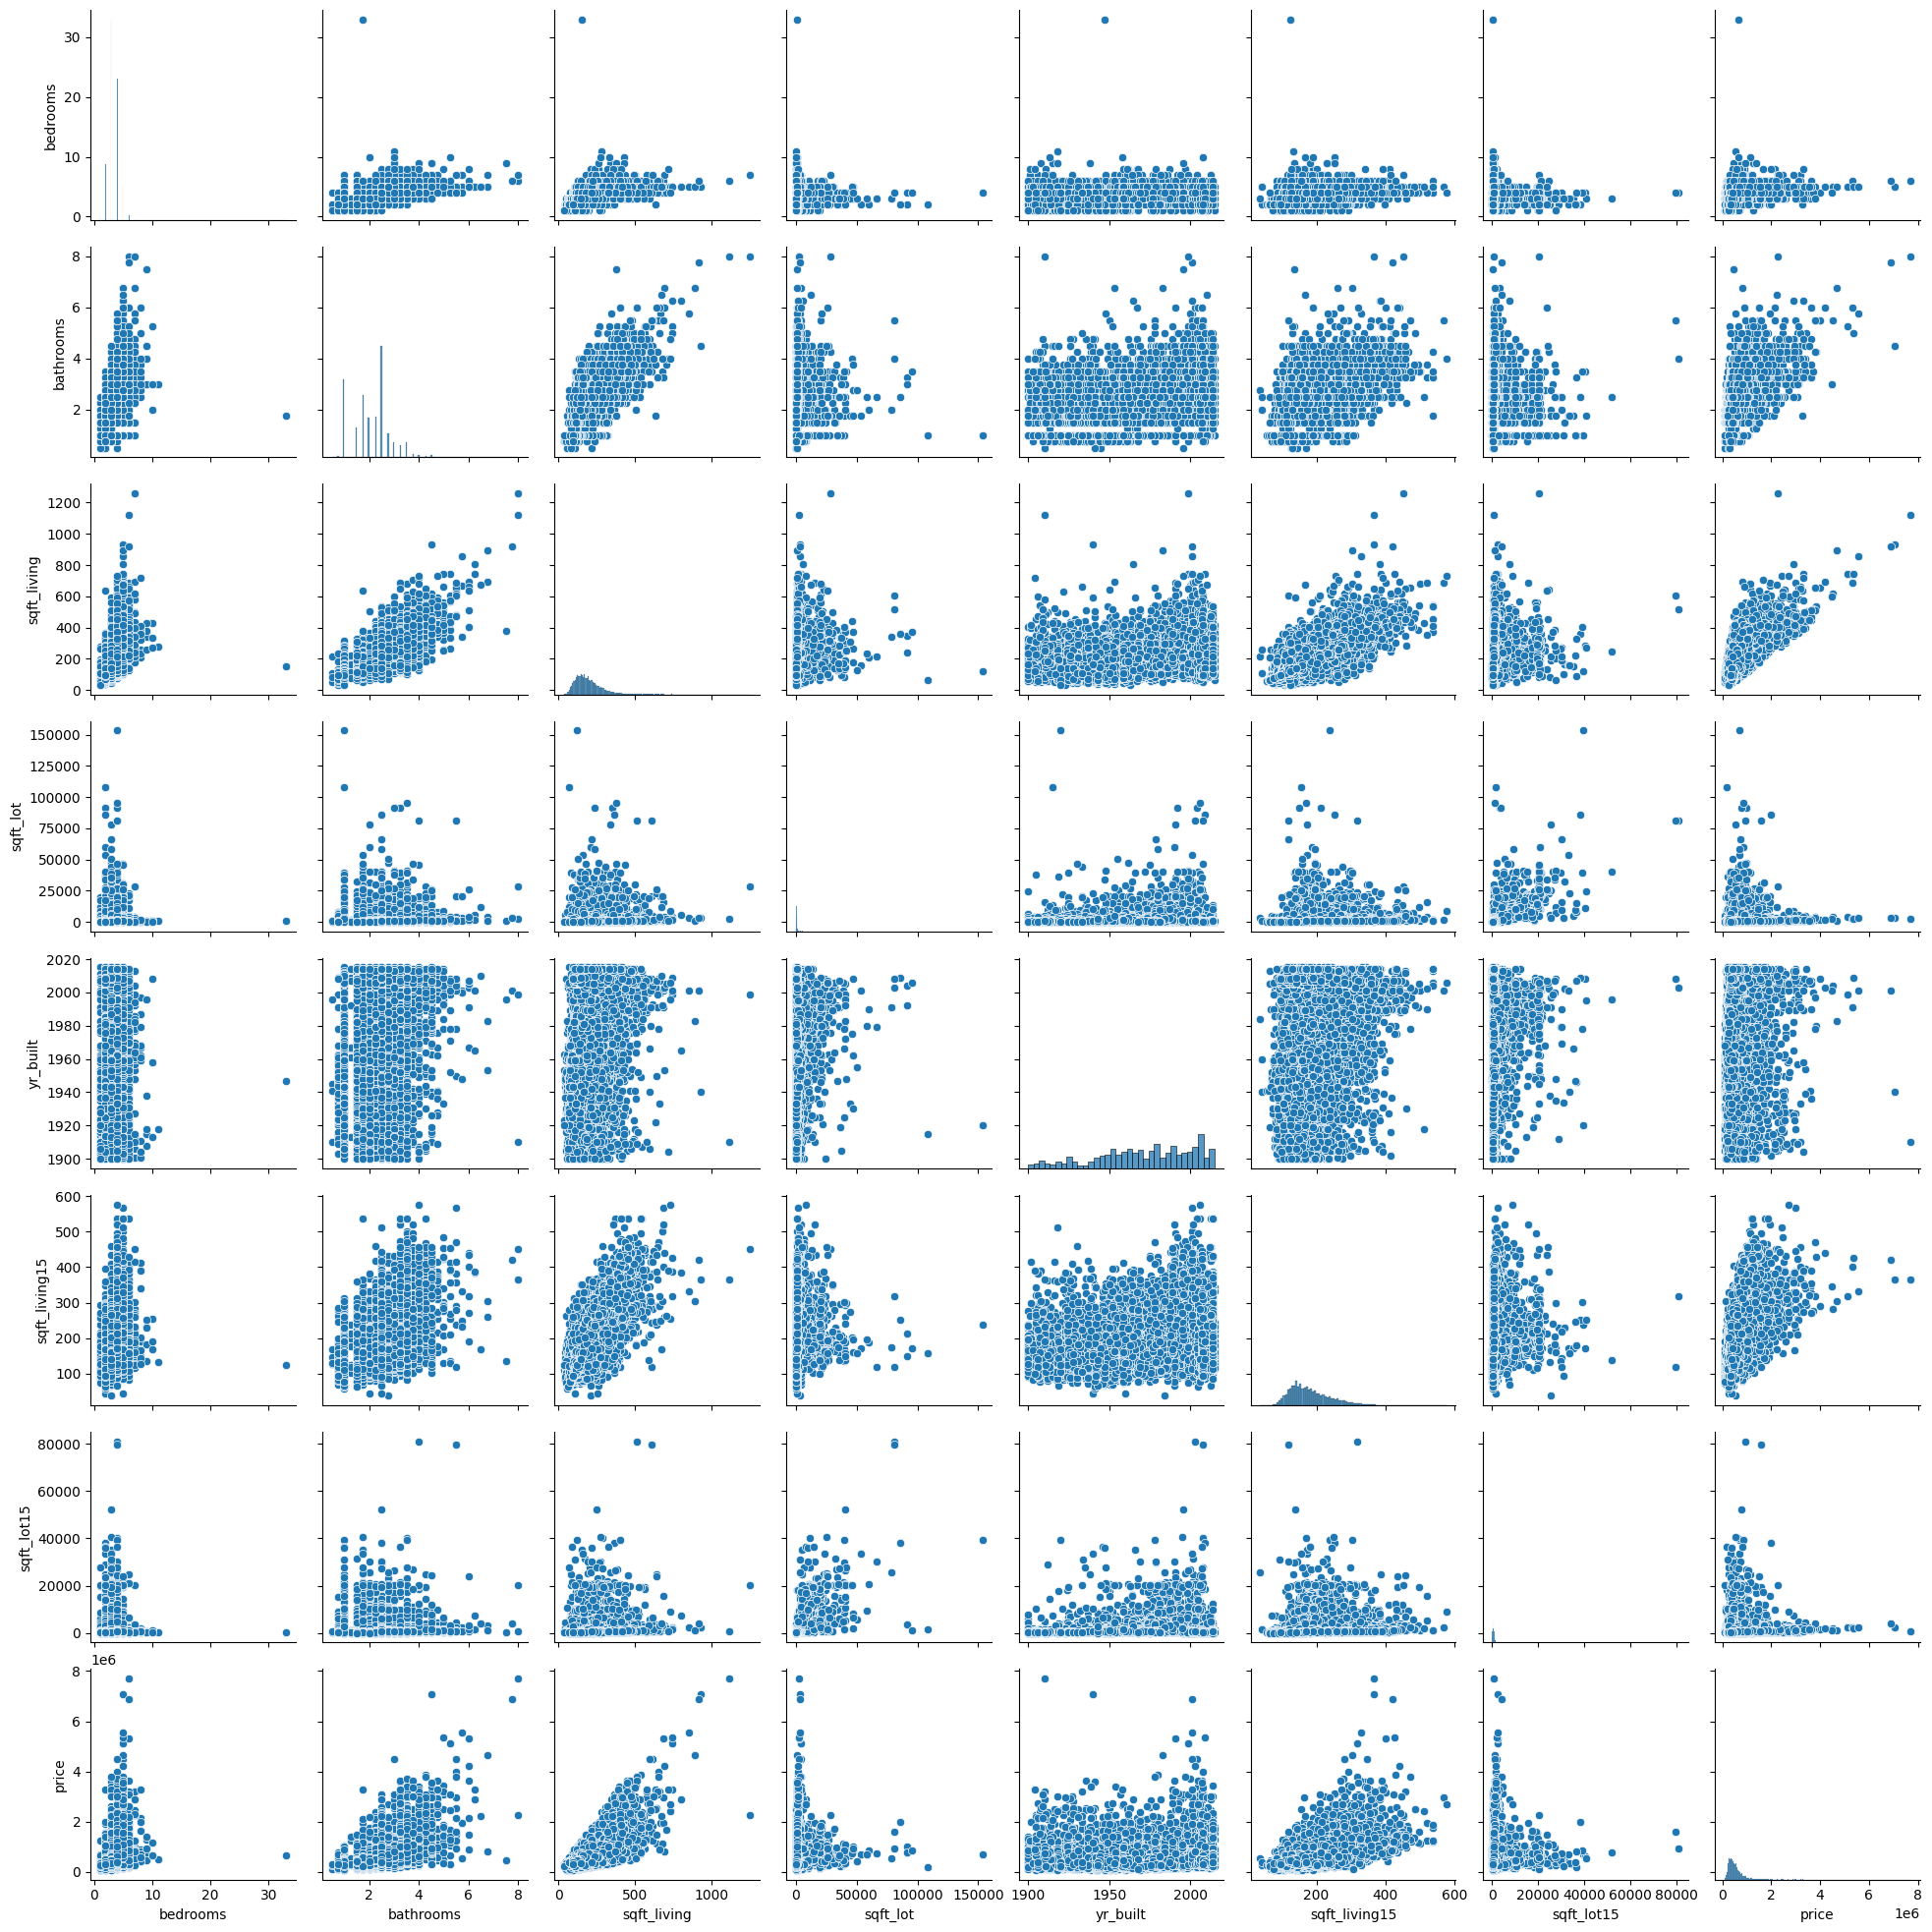

In [23]:
df_overview = df_corr.copy()
df_overview.drop(['lat', 'long','grade', 'zipcode', 'sqft_basement', 'sqft_above', 'floors', 'view', 'condition', 'yr_renovated'], axis='columns', inplace=True)

figure_overview = sns.pairplot(data=df_overview)

Hypothesis 1: Historic houses are more expensive.

Client has the wish to buy an historic house. He defines everything that is older than him as historic. The client was born in 1940.

I created a dataframe with historic and one with modern houses and created a new column called category in each. 
Then,concatenated both again.
Created a group by on the category column and then aggregated the price column with the mean and the standard deviation.
Lastly, I plotted the avg price for historic and modern houses as a bar chart.

In [24]:
#creates dataframe of only historic buildings
df_historic = df_converted.query('yr_built < 1940')
df_modern = df_converted.query('yr_built >= 1940')

#create categories
df_historic['category'] = 'historic'
df_modern['category'] = 'modern'

#concatenate both dfs
df_concatenated = pd.concat([df_historic, df_modern])

#group by category and then calculate median and std on the lot size column
stats_price = df_concatenated.groupby('category')['price'].agg(['mean','std'])

#to not show the stdev bar in the negative direction
stats_price['std_minus'] = None

#plot the mean price of historic vs modern buildings
fig_view_stats_price = px.bar(stats_price, x=stats_price.index, y= 'mean',
                              error_y='std', error_y_minus='std_minus',        
                              title='Avg price USD',
                              labels={'mean': 'avg price $ (std)'},
                              color=stats_price.index,
                              color_discrete_map={'yes': 'grey','no':'purple'})

fig_view_stats_price.update_layout(title_x=0.5,
                             width=400,
                             height=300,
                             bargap=0.6,
                             xaxis_title='house type',
                             showlegend=False,
                             xaxis=dict(showline=True,linecolor='black'),
                             yaxis=dict(showline=True,linecolor='black'),
                             plot_bgcolor='rgba(0,0,0,0)')

fig_view_stats_price.update_traces(error_y=dict(width=0))
fig_view_stats_price.show()

The large price span is an issue. Hence, I wanted to pool the data in how old the house is into bins of 10 years

In [25]:
#bin the year data into bins of 10 years.
bins = range(1900,2021,10)

#create new column with the binned values
df_converted['decade_built'] = pd.cut(df_converted['yr_built'], bins = bins, 
                            labels=[f"{start}-{start+9}" for start in bins[:-1]], right=False)

Created a bar chart of average price per decade, when the house was build. 
Bars that are considered historic are marked in purple.

In [26]:
#group by decade built in and calculate average prize
avg_price_per_decade  = df_converted.groupby('decade_built')['price'].mean().reset_index()

#defining a color map manually
color_map = {'1900-1909':'purple', '1910-1919':'purple', '1920-1929':'purple', '1930-1939':'purple',
             '1940-1949':'grey', '1950-1959':'grey', '1960-1969':'grey', '1970-1979':'grey',
             '1980-1989':'grey', '1990-1999':'grey', '2000-2009':'grey', '2010-2019':'grey'}

#plot a bargraph with historic houses highlighted. Historic defined as older than my client. historic < 1940 yr.
fig_avg_price_per_decade = px.bar(avg_price_per_decade, x='decade_built', y='price',
                                  title='Average house price per decade',
                                  labels = {'decade_built': 'decade built', 'price': 'price $'},
                                  color='decade_built', color_discrete_map=color_map)

fig_avg_price_per_decade.update_layout(title_x=0.5,
                                       width=700,
                                       height=400,
                                       bargap=0.5,
                                       xaxis=dict(showgrid=False, zeroline=True, linecolor='black'),
                                       yaxis=dict(showgrid=False, zeroline=True, linecolor='black'),
                                       showlegend=False,
                                       plot_bgcolor='rgba(0,0,0,0)')
fig_avg_price_per_decade.show()

Lastly, since my client wants no waterfront, I wanted to give him an overview on the distribution of prices of historic houses with no waterfront. Chose median as the central tendency measure.

In [27]:
#now focus on historic houses with no water front
df_historic_no_wf = df_converted.query('waterfront == "no" and yr_built < 1940')
median_price = df_historic_no_wf.price.median()
fig_historic_no_wf_price = px.histogram(df_historic_no_wf, x='price',
                                        title='Prices of historic houses with no waterfront',
                                        labels={'price': 'price $', 'count':'count'},
                                        color_discrete_sequence=['purple'])
#add vertical line
fig_historic_no_wf_price.add_vline(x=median_price, line_dash='dash', line_color = 'black', 
                                   annotation_text=f'Median:{median_price: .0f} $',
                                   annotation_position="bottom right",
                                   annotation = dict(x=median_price + 100000, y=0.9))
#update layout
fig_historic_no_wf_price.update_layout(title_x=0.5,
                                       width=700,
                                       height=350,
                                       xaxis=dict(showgrid=False, zeroline=True, linecolor='black'),
                                       yaxis=dict(showgrid=False, zeroline=True, linecolor='black'),
                                       plot_bgcolor='rgba(0,0,0,0)')
#show the plot
fig_historic_no_wf_price

Expanded on that graph by adding the the histogram of all modern houses

In [28]:
#now focus on historic and modern houses distribution
df_historic = df_converted.query('yr_built < 1940')
df_modern = df_converted.query('yr_built > 1940')

#median price for historic houses
median_price_historic = df_historic.price.median()

#median price for modern house
median_price_modern = df_modern.price.median()

#histogram for historic houses
fig_historic_price = px.histogram(df_historic, x='price',
                                        title='Prices of historic houses',
                                        labels={'price': 'price $', 'count':'count'},
                                        color_discrete_sequence=['purple'])

#histogram for modern houses
fig_modern_price = px.histogram(df_modern, x='price',
                                        title='Prices of modern houses',
                                        labels={'price': 'price $', 'count':'count'},
                                        color_discrete_sequence=['grey'])

fig_modern_price.update_traces(marker=dict(color='grey'))

#add vertical line for historic median
fig_historic_price.add_vline(x=median_price_historic, line_dash='dash', line_color = 'purple', 
                                   annotation_text=f'Historic house median:{median_price_historic: .0f} $',
                                   annotation_position="bottom right",
                                   annotation = dict(font=dict(color='purple'), x=median_price_historic + 100000, y=0.9))

#combine both figures
fig_combined = fig_historic_price.add_trace(fig_modern_price.data[0])

fig_combined.add_vline(x=median_price_modern, line_dash='dash', line_color = 'lightgrey', 
                                   annotation_text=f'Modern house median:{median_price_modern: .0f} $',
                                   annotation_position="bottom right",
                                   annotation = dict(font=dict(color='grey'), x=0.97, y=1.05),
                                   )

#update layout
fig_historic_price.update_layout(title_x=0.5,
                                       width=700,
                                       height=350,
                                       xaxis=dict(showgrid=False, zeroline=True, linecolor='black'),
                                       yaxis=dict(showgrid=False, zeroline=True, linecolor='black'),
                                       plot_bgcolor='rgba(0,0,0,0)')
#show the plot
fig_combined.show()

Hypothesis 2: Houses without a waterfront have lower view ratings.

Create a new data frame copy and drop rows based on null values in the view column.

In [29]:
#Clean the view column, by removing NaNs and turning the rest into integers.
#create copy for the view hyopthesis
df_view = df_converted.copy()

#drop the row if there is a NaN in the view column
df_view.dropna(subset=['view'],inplace=True)

#convert floats into integers.
df_view['view'] = df_view['view'].astype(int)

Create new df containing normalized counts per view rating for each waterfront category. This was needed, because the range of the y-axes were so different for the two groups.

In [30]:
#Normalized the view counts of the individual groups: No waterfront vs with waterfront. 
normalized_counts = non_normalized_counts = df_view.groupby(['waterfront', 'view']).size().reset_index(name='counts')
normalized_counts['normalized counts'] = non_normalized_counts.groupby('waterfront')['counts'].transform(lambda x: x / x.max())


#plotted them as sublots.
fig_distribution_view = px.bar(normalized_counts, x='view', y='normalized counts', 
                                color='waterfront',
                                title='View ratings with and without a waterfront',
                                category_orders = {'waterfront':['no','yes']},
                                color_discrete_map={'yes': 'black','no':'orange'},
                                facet_row='waterfront',
                                facet_row_spacing=0.05,
                                labels = {'view': 'view rating', 'normalized counts': 'norm . counts'}
                                )

fig_distribution_view.update_layout(title_x=0.5,
                                    width=500,
                                    height=400,
                                    showlegend=False,
                                    bargap=0.5,
                                    xaxis=dict(showline= True, linecolor='black'),
                                    xaxis2=dict(showline= True, linecolor='black'),
                                    yaxis=dict(showline= True, linecolor='black'),
                                    yaxis2=dict(showline=True, linecolor='black'),
                                    plot_bgcolor='rgba(0,0,0,0)')

fig_distribution_view

Similar as to in one of the analysis above I wanted to directly quantify the average view rating per category.

In [31]:
#calculate mean and standard deviation on the view column in a grouped by waterfront setting.
stats = df_view.groupby('waterfront')['view'].agg(['mean','std'])

#To not show negative part of stdev error line.
stats['std_minus'] = None

#plot bar graph
fig_view_stats = px.bar(stats, x=stats.index, y= 'mean', 
                        error_y='std', error_y_minus='std_minus',
                        title='Average view rating (stdev)',
                        labels={'mean': 'avg view rating'},
                        color=stats.index,
                        color_discrete_map={'yes': 'black','no':'orange'})

fig_view_stats.update_layout(title_x=0.5,
                             width=400,
                             height=300,
                             bargap=0.5,
                             xaxis_title='waterfront',
                             showlegend=False,
                             xaxis=dict(showline=True,linecolor='black'),
                             yaxis=dict(showline=True,linecolor='black'),
                             plot_bgcolor='rgba(0,0,0,0)')

fig_view_stats.update_traces(error_y=dict(width=0))
fig_view_stats.show()



Hypothesis 3: Historic houses have smaller lots.

Lastly, my client wants a gigantic lot. He wants a tennis court, golf court and a swimming pool minimum.

So, I wanted to see, whether his wish for historic houses could impede with the wish for a large lot.

Described the median lot size for historic vs modern houses.

In [32]:
#group by category and then calculate median and std on the lot size column
stats_lotsize = df_concatenated.groupby('category')['sqft_lot'].agg(['median','std'])

#plot the median lot size of historic vs modern buildings
fig_view_stats_lotsize = px.bar(stats_lotsize, x=stats_lotsize.index, y= 'median',        
                        title='Median lot size [sqm]',
                        labels={'median': 'median lot size [sqm]'},
                        color=stats.index,
                        color_discrete_map={'yes': 'black','no':'orange'})

fig_view_stats_lotsize.update_layout(title_x=0.5,
                             width=400,
                             height=300,
                             bargap=0.6,
                             xaxis_title='house type',
                             showlegend=False,
                             xaxis=dict(showline=True,linecolor='black'),
                             yaxis=dict(showline=True,linecolor='black'),
                             plot_bgcolor='rgba(0,0,0,0)')

fig_view_stats_lotsize.update_traces(error_y=dict(width=0))
fig_view_stats_lotsize.show()


Visualize the distribution of modern and historic houses regarding the lot size

In [33]:
#now focus on historic and modern houses distribution
df_historic = df_converted.query('yr_built < 1940')
df_modern = df_converted.query('yr_built > 1940')

#median price for historic houses
median_lot_historic = df_historic.sqft_lot.median()

#median price for modern house
median_lot_modern = df_modern.sqft_lot.median()

#histogram for historic houses
fig_historic_sqft_lot = px.histogram(df_historic, x='sqft_lot',
                                        title='Lot size',
                                        labels={'sqft_lot': 'sqm lot', 'count':'count'},
                                        color_discrete_sequence=['orange'])

#histogram for modern houses
fig_modern_sqft_lot = px.histogram(df_modern, x='sqft_lot',
                                        title='Lot size',
                                        labels={'sqft_lot': 'sqm lot', 'count':'count'},
                                        color_discrete_sequence=['grey'])

fig_modern_price.update_traces(marker=dict(color='black'))

#add vertical line for historic median
fig_historic_sqft_lot.add_vline(x=median_lot_historic, line_dash='dash', line_color = 'orange', 
                                   annotation_text=f'Historic house median:{median_lot_historic: .0f} sqm',
                                   annotation_position="bottom right",
                                   annotation = dict(font=dict(color='orange'), x=100, y=1.03))

#combine both figures
fig_combined2 = fig_historic_sqft_lot.add_trace(fig_modern_sqft_lot.data[0])

fig_combined2.add_vline(x=median_lot_modern, line_dash='dash', line_color = 'lightgrey', 
                                   annotation_text=f'Modern house median:{median_lot_modern: .0f} sqm',
                                   annotation_position="bottom right",
                                   annotation = dict(font=dict(color='grey'), x=800, y=0.95),
                                   )

#update layout
fig_historic_sqft_lot.update_layout(title_x=0.5,
                                       width=700,
                                       height=350,
                                       xaxis=dict(showgrid=False, zeroline=True, linecolor='black'),
                                       yaxis=dict(showgrid=False, zeroline=True, linecolor='black'),
                                       plot_bgcolor='rgba(0,0,0,0)')

fig_combined2.update_xaxes(range=[0,3000])
#show the plot
fig_combined2.show()

Created filtered geomap with perfect houses.

Areas are given in sqm and total area is the minimum lot size requirements.

Tenniscourt = 261, 
swimming pool = 18, 
small golf court = 850, 
total minimum required area = 1200


In [34]:
#queried all of clients wishes for a perfect house
df_perfect_house = df_converted.query('bathrooms >= 4 and sqft_lot >= 1200 and yr_built < 1940 and waterfront == "no"')

#plotted them on a map with street view style
fig_map = px.scatter_mapbox(df_perfect_house, lat='lat', lon='long',
                        hover_name = 'id',
                        hover_data=['price'],
                        size='price',
                        color_continuous_scale='Viridis', size_max=15,
                        range_color=(min(df_perfect_house['price']), max(df_perfect_house['price'])),
                        zoom=10)
fig_map.update_layout(mapbox_style="open-street-map")

fig_map.show()

One suggestion for the client was to lower the minimum number of required bathrooms to 4 instead of. Now, the number of houses that would have fulfilled his wishes in the past more than doubled.

In [35]:
#adjusted to also alow for houses with 'only' 3 bathrooms
df_perfect_house_2 = df_converted.query('bathrooms >= 3 and sqft_lot >= 1200 and yr_built < 1940 and waterfront == "no"')

fig_map_2 = px.scatter_mapbox(df_perfect_house_2, lat='lat', lon='long',
                        hover_name = 'id',
                        hover_data=['price'],
                        size='price',
                        color_continuous_scale='Viridis', size_max=15,
                        range_color=(min(df_perfect_house_2['price']), max(df_perfect_house_2['price'])),
                        zoom=10)
fig_map_2.update_layout(mapbox_style="open-street-map")

fig_map_2.show()